In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df = pd.read_csv('G:\Mtech - Sem 1\Soft computing\single perceptron\Project\Dataset\sonar data.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
print(len(df.columns))

61


In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
x = df[df.columns[0:60]].values
y = df[df.columns[60]]

# Exploring Target Variable

### 60 input features # 1 target attribute

### target R - Rock, M - Mine

In [7]:
y.unique()

array(['R', 'M'], dtype=object)

In [8]:
y.value_counts()

M    111
R     97
Name: 60, dtype: int64

in the file "sonar-mines" contains 111 patterns obtained by bouncing sonar signals off a mine at various angles and under various conditions.

in the file "sonar-rocks" contains 97 patterns obtained from rocks under similar conditions.

The transmitted sonar signal is a frequency-modulated chirp, rising in frequency.

The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the mine and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. 
Each number represents the energy within a particular frequency band, integrated over a certain period of time. 
The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

C:\Users\MYPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


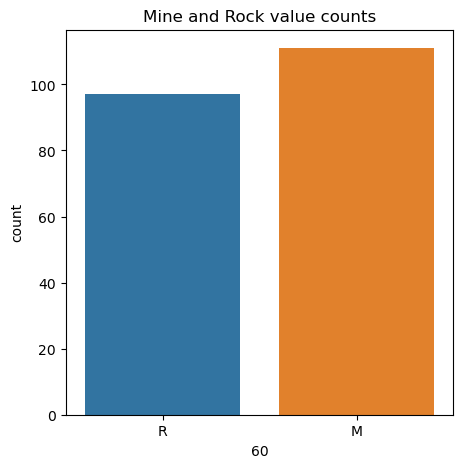

In [9]:
import seaborn as sns
plt.figure(figsize=(5,5))
plt.title('Mine and Rock value counts')
sns.countplot(y)
plt.show()

#### encoding the target attribute

In [10]:
#function for applying one_hot_encoder
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels,n_unique_labels))
  one_hot_encode[np.arange(n_labels), labels] = 1
  return one_hot_encode

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = one_hot_encode(y)

#### Rock is labelled as 1, mine is labelled as 0

## Splitting Data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 42)

### variables

Learning Rate: The amount by which the weight will be adjusted.
    
Training Epochs: No. of iterations
    
Cost History: An array that stores the cost values in successive epochs.
    
Weight: Tensor variable for storing weight values
    
Bias: Tensor variable for storing bias values

In [13]:
learning_rate = 0.1
training_epochs = 1000
 
#Array to store cost obtained in each epoch
cost_history = np.empty(shape=[1],dtype=float)

In [14]:
n_dim = x.shape[1]
n_class = 2
tf.compat.v1.disable_eager_execution() 
X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))

In [15]:
#initialize all variables.
init = tf.compat.v1.global_variables_initializer()

In [16]:
#define the cost function
y_ = tf.compat.v1.placeholder(tf.float32,[None,n_class])
y = tf.nn.softmax(tf.matmul(X, W)+ b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.math.log(y)),axis=[1]))
training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [17]:
#initialize the session
sess = tf.compat.v1.Session()
sess.run(init)
mse_history = []

In [18]:
x_train.shape

(166, 60)

In [19]:
y_train.shape

(166, 2)

In [20]:
#calculate the cost for each epoch
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:x_train,y_:y_train})
    cost = sess.run(cost_function,feed_dict={X: x_train,y_: y_train})
    cost_history = np.append(cost_history,cost)
    print('epoch : ', epoch,  ' - ', 'cost: ', cost)
 
pred_y = sess.run(y, feed_dict={X: x_test})


epoch :  0  -  cost:  0.69058275
epoch :  1  -  cost:  0.68855274
epoch :  2  -  cost:  0.6867058
epoch :  3  -  cost:  0.68493444
epoch :  4  -  cost:  0.68320525
epoch :  5  -  cost:  0.6815077
epoch :  6  -  cost:  0.67983776
epoch :  7  -  cost:  0.67819387
epoch :  8  -  cost:  0.6765749
epoch :  9  -  cost:  0.67498004
epoch :  10  -  cost:  0.6734085
epoch :  11  -  cost:  0.6718597
epoch :  12  -  cost:  0.6703329
epoch :  13  -  cost:  0.6688275
epoch :  14  -  cost:  0.66734296
epoch :  15  -  cost:  0.6658786
epoch :  16  -  cost:  0.664434
epoch :  17  -  cost:  0.6630085
epoch :  18  -  cost:  0.6616018
epoch :  19  -  cost:  0.6602132
epoch :  20  -  cost:  0.65884227
epoch :  21  -  cost:  0.65748864
epoch :  22  -  cost:  0.65615183
epoch :  23  -  cost:  0.65483147
epoch :  24  -  cost:  0.65352714
epoch :  25  -  cost:  0.65223837
epoch :  26  -  cost:  0.6509649
epoch :  27  -  cost:  0.6497065
epoch :  28  -  cost:  0.6484625
epoch :  29  -  cost:  0.64723283
epoch 

epoch :  272  -  cost:  0.51518625
epoch :  273  -  cost:  0.5149375
epoch :  274  -  cost:  0.5146899
epoch :  275  -  cost:  0.51444334
epoch :  276  -  cost:  0.5141978
epoch :  277  -  cost:  0.5139534
epoch :  278  -  cost:  0.5137099
epoch :  279  -  cost:  0.5134675
epoch :  280  -  cost:  0.51322603
epoch :  281  -  cost:  0.5129856
epoch :  282  -  cost:  0.5127462
epoch :  283  -  cost:  0.51250786
epoch :  284  -  cost:  0.51227045
epoch :  285  -  cost:  0.51203406
epoch :  286  -  cost:  0.5117986
epoch :  287  -  cost:  0.51156414
epoch :  288  -  cost:  0.51133066
epoch :  289  -  cost:  0.5110981
epoch :  290  -  cost:  0.5108666
epoch :  291  -  cost:  0.51063585
epoch :  292  -  cost:  0.5104062
epoch :  293  -  cost:  0.51017743
epoch :  294  -  cost:  0.50994956
epoch :  295  -  cost:  0.50972265
epoch :  296  -  cost:  0.5094967
epoch :  297  -  cost:  0.50927156
epoch :  298  -  cost:  0.5090474
epoch :  299  -  cost:  0.50882405
epoch :  300  -  cost:  0.50860167

epoch :  552  -  cost:  0.47080433
epoch :  553  -  cost:  0.470701
epoch :  554  -  cost:  0.47059777
epoch :  555  -  cost:  0.47049484
epoch :  556  -  cost:  0.47039217
epoch :  557  -  cost:  0.4702897
epoch :  558  -  cost:  0.4701875
epoch :  559  -  cost:  0.4700855
epoch :  560  -  cost:  0.46998376
epoch :  561  -  cost:  0.4698822
epoch :  562  -  cost:  0.4697809
epoch :  563  -  cost:  0.46967986
epoch :  564  -  cost:  0.46957895
epoch :  565  -  cost:  0.46947837
epoch :  566  -  cost:  0.469378
epoch :  567  -  cost:  0.46927786
epoch :  568  -  cost:  0.46917793
epoch :  569  -  cost:  0.46907815
epoch :  570  -  cost:  0.46897873
epoch :  571  -  cost:  0.46887943
epoch :  572  -  cost:  0.46878037
epoch :  573  -  cost:  0.4686815
epoch :  574  -  cost:  0.46858293
epoch :  575  -  cost:  0.46848452
epoch :  576  -  cost:  0.4683864
epoch :  577  -  cost:  0.46828842
epoch :  578  -  cost:  0.46819067
epoch :  579  -  cost:  0.46809313
epoch :  580  -  cost:  0.46799

epoch :  832  -  cost:  0.44858915
epoch :  833  -  cost:  0.44852746
epoch :  834  -  cost:  0.4484658
epoch :  835  -  cost:  0.44840434
epoch :  836  -  cost:  0.44834283
epoch :  837  -  cost:  0.44828144
epoch :  838  -  cost:  0.44822016
epoch :  839  -  cost:  0.44815904
epoch :  840  -  cost:  0.4480979
epoch :  841  -  cost:  0.44803688
epoch :  842  -  cost:  0.44797608
epoch :  843  -  cost:  0.44791517
epoch :  844  -  cost:  0.44785446
epoch :  845  -  cost:  0.44779384
epoch :  846  -  cost:  0.44773328
epoch :  847  -  cost:  0.44767275
epoch :  848  -  cost:  0.4476124
epoch :  849  -  cost:  0.44755214
epoch :  850  -  cost:  0.44749194
epoch :  851  -  cost:  0.44743177
epoch :  852  -  cost:  0.44737175
epoch :  853  -  cost:  0.44731182
epoch :  854  -  cost:  0.44725198
epoch :  855  -  cost:  0.44719222
epoch :  856  -  cost:  0.44713253
epoch :  857  -  cost:  0.44707292
epoch :  858  -  cost:  0.44701344
epoch :  859  -  cost:  0.446954
epoch :  860  -  cost:  0

Accuracy: 0.85714287


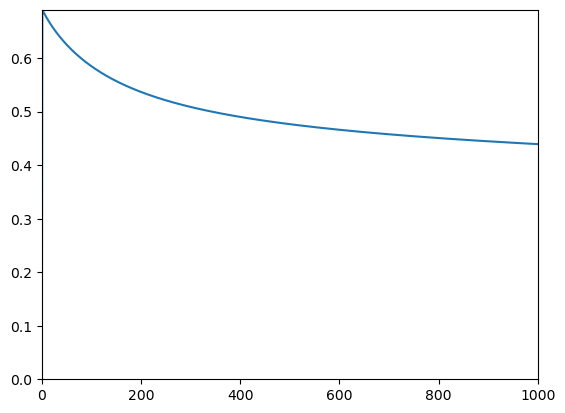

In [21]:
#Calculate Accuracy
correct_prediction = tf.equal(tf.argmax(pred_y,1), tf.argmax(y_test,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:",sess.run(accuracy))
 
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

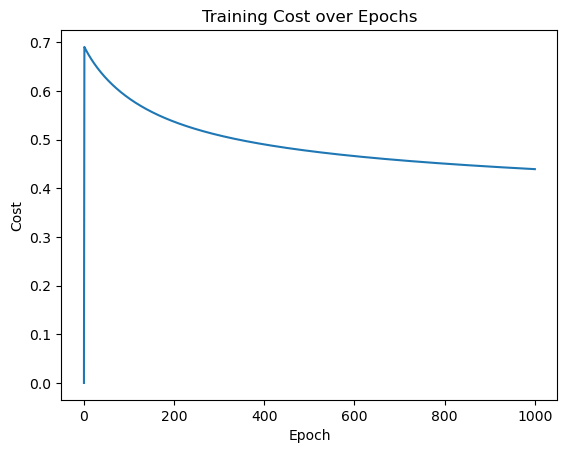

In [22]:
plt.plot(range(len(cost_history)), cost_history)
plt.title('Training Cost over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

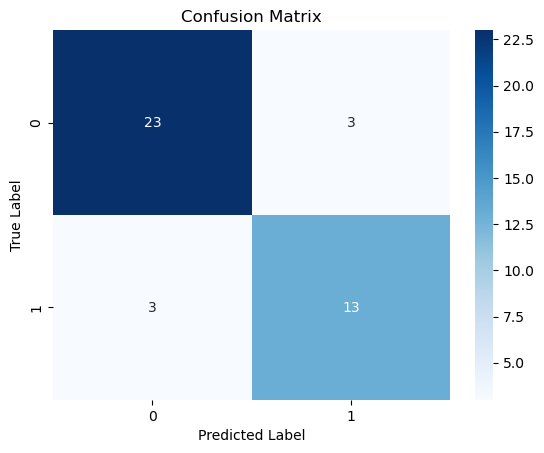

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(pred_y, axis=1)
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

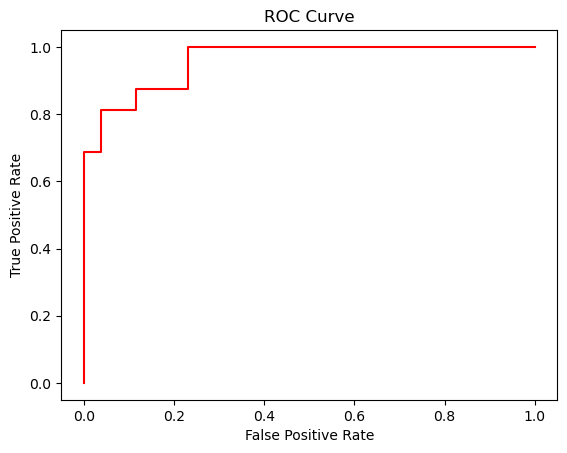

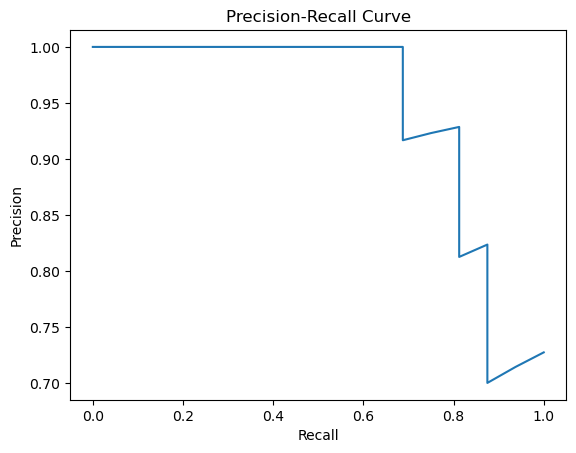

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

fpr, tpr, _ = roc_curve(np.argmax(y_test, axis=1), pred_y[:, 1])
plt.plot(fpr, tpr, color = 'red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

precision, recall, _ = precision_recall_curve(np.argmax(y_test, axis=1), pred_y[:, 1])
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [25]:
from sklearn.metrics import classification_report

# convert the predicted probabilities to class labels
y_pred = np.argmax(pred_y, axis=1)

# generate the classification report
target_names = ['class 0', 'class 1']
print(classification_report(y_test.argmax(axis=1), y_pred, target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.88      0.88      0.88        26
     class 1       0.81      0.81      0.81        16

    accuracy                           0.86        42
   macro avg       0.85      0.85      0.85        42
weighted avg       0.86      0.86      0.86        42

